In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers, callbacks

from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/My Drive/Google colab Save/kaggle/0.doc_for_me

Mounted at /content/drive
/content/drive/My Drive/Google colab Save/kaggle/0.doc_for_me


In [2]:
# Loading data
data = pd.read_csv('data/fuel.csv')
print(data.shape)
data.head()

(1107, 14)


,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EngDispl             1107 non-null   float64
 1   NumCyl               1107 non-null   int64  
 2   Transmission         1107 non-null   object 
 3   FE                   1107 non-null   float64
 4   AirAspirationMethod  1107 non-null   object 
 5   NumGears             1107 non-null   int64  
 6   TransLockup          1107 non-null   int64  
 7   TransCreeperGear     1107 non-null   int64  
 8   DriveDesc            1107 non-null   object 
 9   IntakeValvePerCyl    1107 non-null   int64  
 10  ExhaustValvesPerCyl  1107 non-null   int64  
 11  CarlineClassDesc     1107 non-null   object 
 12  VarValveTiming       1107 non-null   int64  
 13  VarValveLift         1107 non-null   int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 121.2+ KB


In [10]:
X = data.copy()
y = X.pop('FE')

# Preprocessing
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


In [11]:
model = keras.Sequential()
model.add(layers.InputLayer(input_shape=input_shape))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam',loss='mae')

In [ ]:
history = model.fit(X, y, batch_size=128, epochs=200)

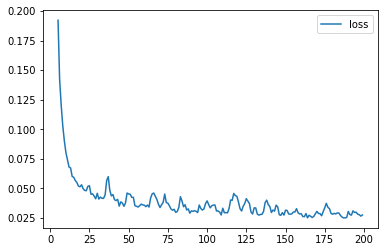

In [ ]:
result = pd.DataFrame(history.history)
result.loc[5:].plot()

작은 배치사이즈는 노이즈가 많이 들어간다. 참고하는 데이터의 양이 적기 때문에 노이즈의 영향이 크기 때문이다.
배치가 크면 정밀하게 학습하지만 시간이 많이 걸린다. 
러닝레이트가 크면 수렴하지 않고
작으면 수렴에 시간이 오래 걸린다.


## with early stopping

In [12]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [13]:
train_X, test_X, train_y, test_y = train_test_split(X, y,train_size=0.8)

In [ ]:
history = model.fit(train_X, train_y, validation_data = (test_X,test_y),batch_size=128, epochs=200,
                    callbacks=[early_stopping])

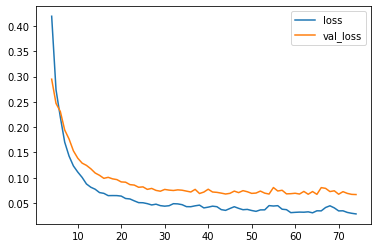

In [15]:
result = pd.DataFrame(history.history)
result.iloc[4:].plot()

## Dropout

Min Val_Loss : 0.06868278980255127


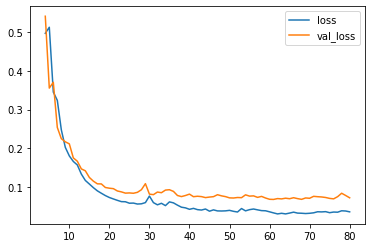

In [30]:
model = keras.Sequential()
model.add(layers.InputLayer(input_shape=input_shape))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam',loss='mae')

history = model.fit(train_X, train_y, validation_data=(test_X, test_y), batch_size=256, epochs=500, callbacks=early_stopping, verbose=0)

result = pd.DataFrame(history.history)

print(f'Min Val_Loss : {result.min()[1]}')

result.loc[4:].plot()

Min Val_Loss : 0.06384211033582687


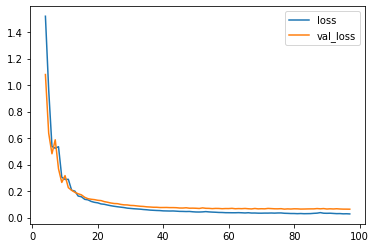

In [29]:
model = keras.Sequential()
model.add(layers.InputLayer(input_shape=input_shape))
model.add(layers.Dense(128,activation='relu'))
# model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam',loss='mae')

history = model.fit(train_X, train_y, validation_data=(test_X, test_y), batch_size=256, epochs=500, callbacks=early_stopping, verbose=0)

result = pd.DataFrame(history.history)

print(f'Min Val_Loss : {result.min()[1]}')

result.loc[4:].plot()

Min Val_Loss : 0.11367131769657135


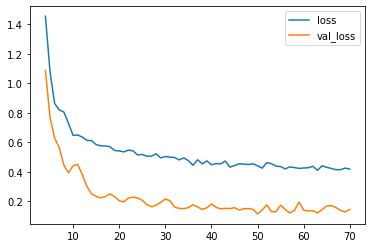

In [33]:
model = keras.Sequential()
model.add(layers.InputLayer(input_shape=input_shape))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(rate=0.3))
# model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(1))

model.compile(optimizer='adam',loss='mae')

history = model.fit(train_X, train_y, validation_data=(test_X, test_y), batch_size=256, epochs=500, callbacks=early_stopping, verbose=0)

result = pd.DataFrame(history.history)

print(f'Min Val_Loss : {result.min()[1]}')

result.loc[4:].plot()

Min Val_Loss : 0.3427695631980896


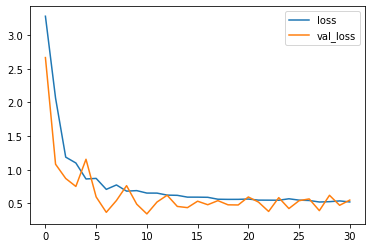

In [42]:
model = keras.Sequential()
model.add(layers.InputLayer(input_shape=input_shape))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(1))

model.compile(optimizer='adam',loss='mae')

history = model.fit(train_X, train_y, validation_data=(test_X, test_y), batch_size=256, epochs=500, callbacks=early_stopping, verbose=0)

result = pd.DataFrame(history.history)

print(f'Min Val_Loss : {result.min()[1]}')

result.plot()

Validation Loss 가 증가하지 않는다는 거는... Underfitting 되고 있다는 것...
반대로 Overfitting되고 있는 모델이 있다면 Dropout을 사용할 수 있다.

## BatchNormalization
- 변수들이 다양한 분포를 가지고 있으면... 
- Initial Weight로 loss 를 계산하고 할... 학습을 할 여건 조차 주어지지 않을 수 있다.
- BatchNormaliztion으로 안정성을 줄 수 있다.

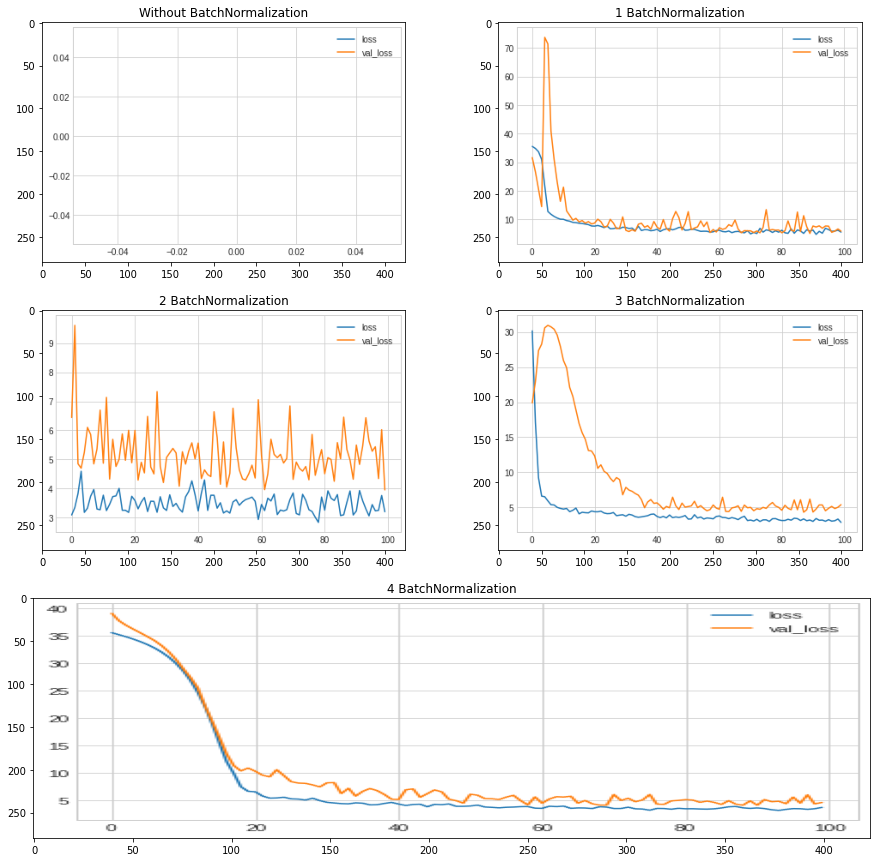

In [63]:
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.title('Without BatchNormalization')
img = mpimg.imread('data/BN_0.png')
plt.imshow(img)

plt.subplot(3,2,2)
plt.title('1 BatchNormalization')
img = mpimg.imread('data/BN_1.png')
plt.imshow(img)

plt.subplot(3,2,3)
plt.title('2 BatchNormalization')
img = mpimg.imread('data/BN_2.png')
plt.imshow(img)

plt.subplot(3,2,4)
plt.title('3 BatchNormalization')
img = mpimg.imread('data/BN_3.png')
plt.imshow(img)

plt.subplot(3,2,(5,6))
plt.title('4 BatchNormalization')
img = mpimg.imread('data/BN_4.png')
plt.imshow(img,aspect='auto')
plt.show()

# Binary Classification

In [68]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [66]:
df_hotel = pd.read_csv('data/hotel.csv')

X = df_hotel.copy()
y = X.pop('is_canceled')

In [69]:
X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

In [70]:
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

In [71]:
model = keras.Sequential()
model.add(layers.BatchNormalization(input_shape=input_shape))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.3))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.3))

model.add(layers.Dense(1,activation='sigmoid'))

In [72]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['binary_accuracy'])

In [73]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta = 0.001,
    restore_best_weights = True
)

In [74]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, batch_size=512, callbacks=[early_stopping])

Epoch 1/100
175/175 [==============================] - 4s 17ms/step - loss: 0.5240 - binary_accuracy: 0.7524 - val_loss: 0.4409 - val_binary_accuracy: 0.8055
Epoch 2/100
175/175 [==============================] - 3s 16ms/step - loss: 0.4260 - binary_accuracy: 0.8036 - val_loss: 0.4040 - val_binary_accuracy: 0.8131
Epoch 3/100
175/175 [==============================] - 3s 16ms/step - loss: 0.4110 - binary_accuracy: 0.8087 - val_loss: 0.3974 - val_binary_accuracy: 0.8148
Epoch 4/100
175/175 [==============================] - 3s 16ms/step - loss: 0.4067 - binary_accuracy: 0.8125 - val_loss: 0.3939 - val_binary_accuracy: 0.8169
Epoch 5/100
175/175 [==============================] - 3s 16ms/step - loss: 0.4039 - binary_accuracy: 0.8131 - val_loss: 0.3910 - val_binary_accuracy: 0.8196
Epoch 6/100
175/175 [==============================] - 3s 16ms/step - loss: 0.3969 - binary_accuracy: 0.8147 - val_loss: 0.3869 - val_binary_accuracy: 0.8217
Epoch 7/100
175/175 [==============================]

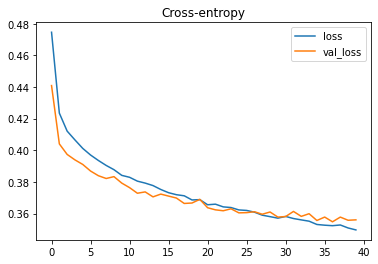

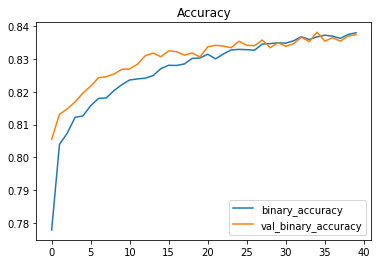

In [75]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")